In [22]:
import gym
import numpy as np
import pandas

import gym_map_bro
import toy_agents

env = gym.make('map-bro-v0')
env.__myinit__()

np.random.seed(0)

# Variable initialization for manual looping
loop = 0

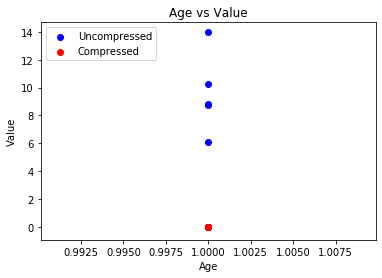

Uncompressed Database:
                  uid              src  sport              dst  age      value
0   CghXHv4P9sybq1dnL  192.168.202.100  45658   192.168.27.203  1.0   8.843050
1  C4SrUv2XNVcWGxMKA4  192.168.202.100  45658   192.168.27.202  1.0  13.954786
2   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0  10.258035
3   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0   8.746679
4   CTySHd36MODzjqHEh   192.168.202.76    137  192.168.202.255  1.0   6.122761
5                 NaN              NaN    NaN              NaN  1.0   0.000000
6                 NaN              NaN    NaN              NaN  1.0   0.000000
7                 NaN              NaN    NaN              NaN  1.0   0.000000
8                 NaN              NaN    NaN              NaN  1.0   0.000000
9                 NaN              NaN    NaN              NaN  1.0   0.000000
Compressed Database:
   uid  src sport  dst  age  value
0  NaN  NaN   NaN  NaN  1.0    0.0
1  NaN  NaN   NaN

0

In [23]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values)
env.render()